In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
base_bank = pd.read_csv("../01_base/bank.csv")

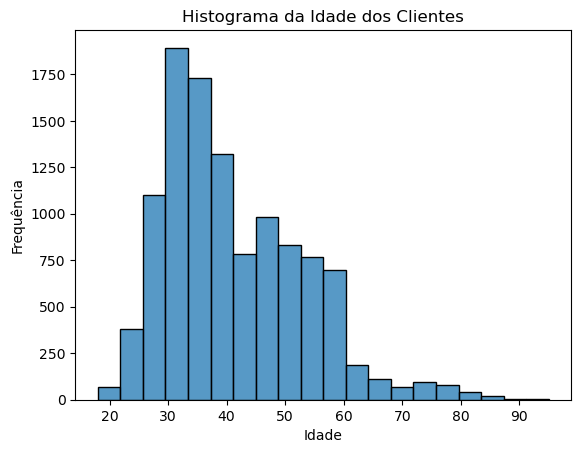

In [72]:
#* 📊 **Exercício 11:** Histograma da idade dos clientes.
sns.histplot(base_bank['age'], bins=20, kde=False)
plt.title('Histograma da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.savefig("../03_saida/historiograma_idade.png", dpi=300, bbox_inches="tight")
plt.show()

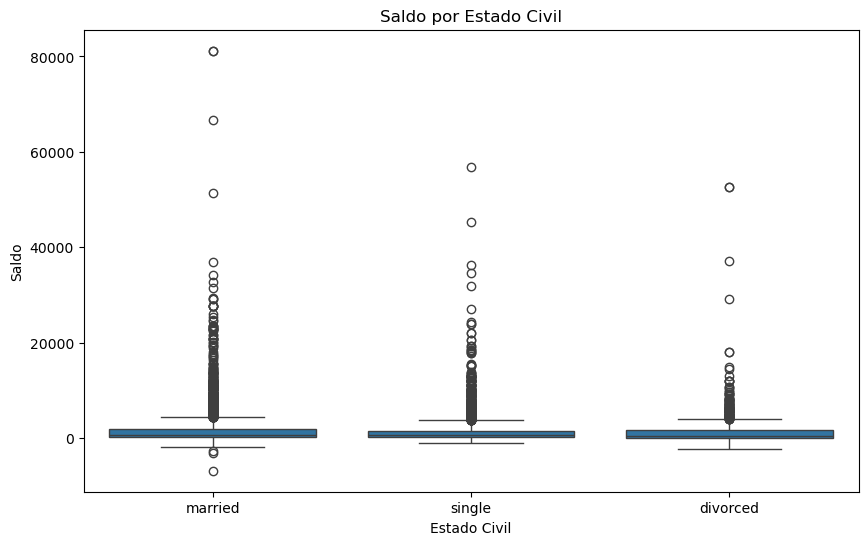

In [73]:
#* 📊 **Exercício 12:** Boxplot do saldo por estado civil.
plt.figure(figsize=(10, 6))
sns.boxplot(x="marital", y="balance", data=base_bank)
plt.title("Saldo por Estado Civil")
plt.xlabel("Estado Civil")
plt.ylabel("Saldo")

plt.savefig("../03_saida/boxplot_estado_civil_saldo.png", dpi=300, bbox_inches="tight")
plt.show()

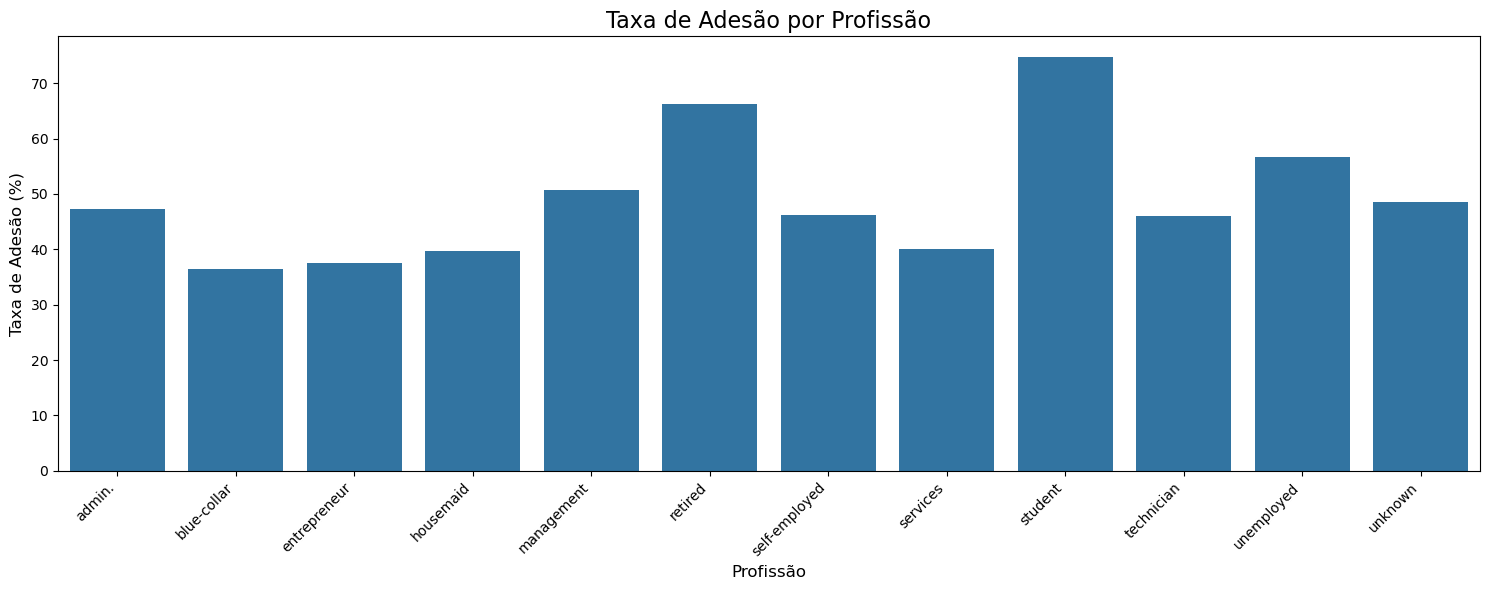

In [74]:
#* 📊 **Exercício 13:** Gráfico de barras da taxa de adesão (`deposit`) por profissão.

base_bank["deposit_numeric"] = base_bank["deposit"].map({"yes": 1, "no": 0}) #converti para numero para poder fazer a media
base_bank["deposit_numeric_pct"] = base_bank["deposit_numeric"] * 100

taxa_por_profissao = base_bank.groupby("job")["deposit_numeric_pct"].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(x='job', y='deposit_numeric_pct', data=taxa_por_profissao)

plt.title('Taxa de Adesão por Profissão', fontsize=16)
plt.xlabel('Profissão', fontsize=12)
plt.ylabel('Taxa de Adesão (%)', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("../03_saida/adesao_por_profissao.png", dpi=300, bbox_inches="tight")
plt.show()


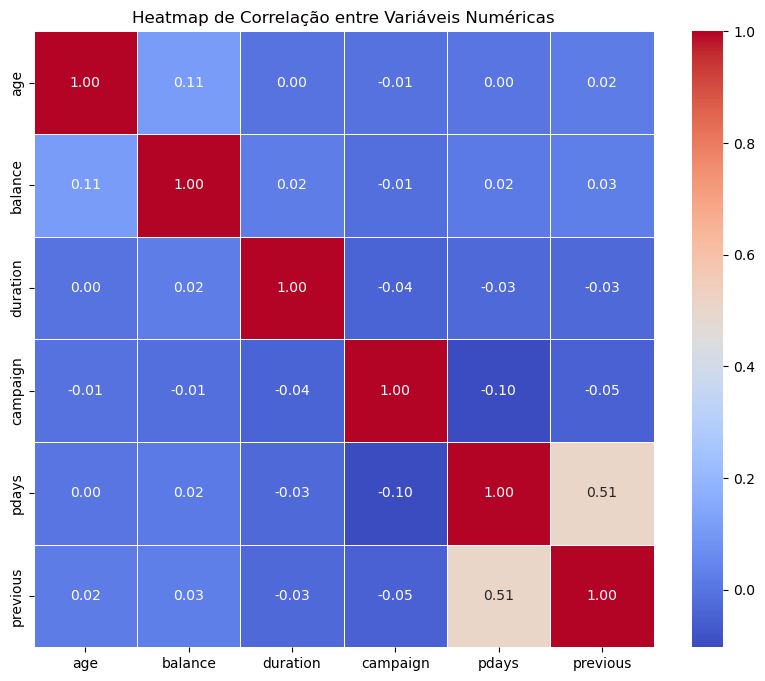

In [75]:
#* 📊 **Exercício 14:** Heatmap de correlação entre as variáveis numéricas (`age, balance, duration, campaign, pdays, previous`).

variaveis_numericas =  ["age", "balance", "duration", "campaign", "pdays", "previous"]
df_numerico = base_bank[variaveis_numericas]

correlacao = df_numerico.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Heatmap de Correlação entre Variáveis Numéricas")
plt.savefig("../03_saida/heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

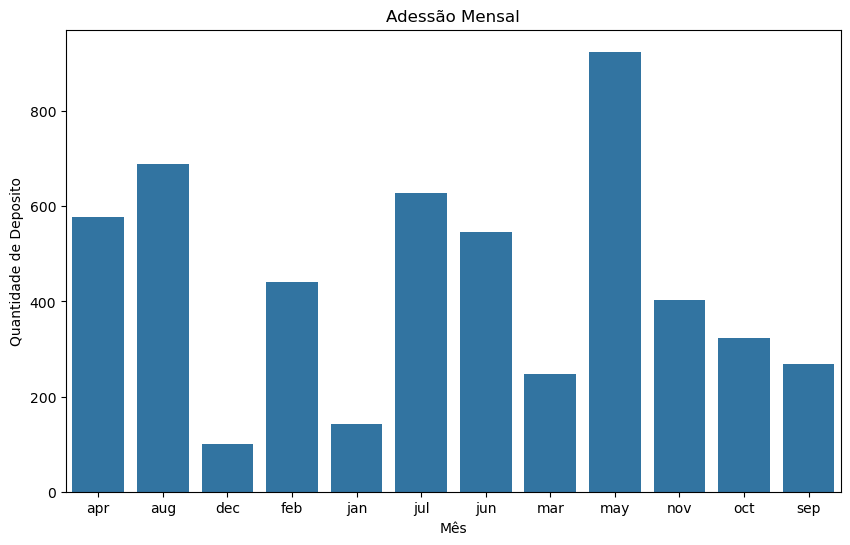

In [76]:
#* 📊 **Exercício 15:** Linha mostrando adesão mensal (quantos contrataram em cada `month`).

base_bank["deposit_numeric"] = base_bank["deposit"].map({"yes": 1, "no": 0}) #converti para numero para poder fazer a media
adesao_mensal = base_bank.groupby("month")["deposit_numeric"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="month", y="deposit_numeric", data= adesao_mensal)

plt.title("Adessão Mensal")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Deposito")

plt.savefig("../03_saida/adesao_mensal.png", dpi=300, bbox_inches="tight")


plt.show()

